In [6]:
import pandas as pd


df_raw = pd.read_csv("UserReport.csv", header=None)


df_raw.head()


,0,1,2,3,4
0,Agent Code,Agent Name,User ID,User Name,Roles
1,DAM88,ACCOUNTING DPT,MIRYANA,miryana hilana,RESERVATION HISTORY
2,NaN,NaN,NaN,NaN,AUDITING SALES
3,NaN,NaN,NaN,NaN,ALL COMPANY PAYMENT
4,NaN,NaN,NaN,NaN,TRAVEL AGENT CONTROL


In [7]:
df_raw.columns = ['Agent Code', 'Agent Name', 'User ID', 'User Name', 'Role']


In [8]:
df_raw.head()

,Agent Code,Agent Name,User ID,User Name,Role
0,Agent Code,Agent Name,User ID,User Name,Roles
1,DAM88,ACCOUNTING DPT,MIRYANA,miryana hilana,RESERVATION HISTORY
2,NaN,NaN,NaN,NaN,AUDITING SALES
3,NaN,NaN,NaN,NaN,ALL COMPANY PAYMENT
4,NaN,NaN,NaN,NaN,TRAVEL AGENT CONTROL


In [10]:
import pandas as pd

# الخطوة 1: قراءة الملف مع تجاهل الصف الأول كرؤوس
df = pd.read_csv("UserReport.csv", header=0)

# الخطوة 2: تسمية الأعمدة (بما أن الصف الأول كان فعلاً رؤوس)
df.columns = ['Agent Code', 'Agent Name', 'User ID', 'User Name', 'Role']

# الخطوة 3: ملء الخلايا الفارغة للأعمدة الأربعة الأولى (المعلومات الثابتة للمستخدم)
df[['Agent Code', 'Agent Name', 'User ID', 'User Name']] = df[['Agent Code', 'Agent Name', 'User ID', 'User Name']].ffill()

# الخطوة 4: حذف الصفوف اللي ما فيها صلاحية (Role)
df = df[df['Role'].notna()].reset_index(drop=True)

# ✅ مراجعة النتيجة
df.head(10)


,Agent Code,Agent Name,User ID,User Name,Role
0,DAM88,ACCOUNTING DPT,MIRYANA,miryana hilana,RESERVATION HISTORY
1,DAM88,ACCOUNTING DPT,MIRYANA,miryana hilana,AUDITING SALES
2,DAM88,ACCOUNTING DPT,MIRYANA,miryana hilana,ALL COMPANY PAYMENT
3,DAM88,ACCOUNTING DPT,MIRYANA,miryana hilana,TRAVEL AGENT CONTROL
4,DAM88,ACCOUNTING DPT,MIRYANA,miryana hilana,REPORTS
5,DAM140,ADAM TRAVEL & TOURISM,ADAM,ADAM TRAVEL & TOURISM,TA ROLE
6,DAM140,ADAM TRAVEL & TOURISM,ADAM1,RIad hamad,TA ROLE WITHOUT
7,DAM140,ADAM TRAVEL & TOURISM,ADAM2,Riad hamad,TA ROLE WITHOUT
8,DAM111,ADONIA,ADONIA1,ADONIA TRAVEL,TA ROLE
9,DAM111,ADONIA,ADONIA2,ADONIA TRAVEL,TA ROLE


In [11]:
df.to_csv("cleaned_users_report.csv", index=False)


In [12]:
user_roles_count = df.groupby('User Name')['Role'].count().sort_values(ascending=False)


In [13]:
top_roles = df['Role'].value_counts().head(10)


In [14]:
section_dist = df[['User ID', 'Agent Name']].drop_duplicates()['Agent Name'].value_counts()


In [15]:
sensitive_keywords = ['DELETE', 'PAYMENT', 'CONTROL', 'ADMIN']
df['Sensitive'] = df['Role'].apply(lambda r: any(k in r.upper() for k in sensitive_keywords))
sensitive_users = df[df['Sensitive']]['User Name'].value_counts()


In [18]:
print("✅ Total users:", df['User ID'].nunique())
print("✅ Total roles assigned:", len(df))
print("✅ Total unique roles:", df['Role'].nunique())
print("✅ Total departments:", df['Agent Name'].nunique())


✅ Total users: 881
✅ Total roles assigned: 1241
✅ Total unique roles: 83
✅ Total departments: 427


In [19]:
roles_per_user = df.groupby('User Name')['Role'].count().sort_values(ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
roles_per_user.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Users by Number of Roles")
plt.xlabel("Number of Roles")
plt.ylabel("User Name")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


C:\Users\sony\AppData\Local\Temp\ipykernel_3404\700561791.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [20]:
role_counts = df['Role'].value_counts().head(15)

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=role_counts.values, y=role_counts.index, palette='viridis')
plt.title("Top 15 Most Common Roles")
plt.xlabel("Count")
plt.ylabel("Role")
plt.tight_layout()
plt.show()


C:\Users\sony\AppData\Local\Temp\ipykernel_3404\2647703547.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_counts.values, y=role_counts.index, palette='viridis')
C:\Users\sony\AppData\Local\Temp\ipykernel_3404\2647703547.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [21]:
roles_per_dept = df.groupby('Agent Name')['Role'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
roles_per_dept.plot(kind='barh', color='lightgreen')
plt.title("Roles per Department")
plt.xlabel("Number of Roles")
plt.ylabel("Department")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


C:\Users\sony\AppData\Local\Temp\ipykernel_3404\2538196121.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [22]:
plt.figure(figsize=(8, 5))
roles_per_user.plot(kind='hist', bins=20, color='purple', edgecolor='black')
plt.title("Distribution of Roles per User")
plt.xlabel("Number of Roles")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()


C:\Users\sony\AppData\Local\Temp\ipykernel_3404\489156004.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [31]:
# عدد المستخدمين الفريدين
num_users = df['User ID'].nunique()

# عدد الأدوار المختلفة
num_roles = df['Role'].nunique()

# عدد الصلاحيات المختلفة
role_counts = df['Role'].value_counts()
num_users


881

In [32]:
num_roles

83

In [34]:
# تحويل توزيع الصلاحيات إلى DataFrame
role_summary_df = role_counts.reset_index()
role_summary_df.columns = ['Role', 'Number of Users']


# لو تريد عرضه بشكل أجمل في Jupyter Notebook
import IPython.display as display
display.display(role_summary_df.head(20))


,Role,Number of Users
0,TA ROLE,315
1,TA ROLE UAE,196
2,SALES OFFICERS,145
3,GSA Role UAEmai,78
4,SALES OFFICE CHIEF,36
5,ON HOLD,33
6,CANCEL SEGMENT,28
7,FLIGHT MANIFEST,22
8,TA ROLE WITHOUT,21
9,REFUND ROLE,19


In [36]:
# عدد المستخدمين لكل وكيل (Agent)
users_per_agent = df.groupby('Agent Name')['User ID'].nunique().sort_values(ascending=False)

# عدد الصلاحيات لكل مستخدم
roles_per_user = df.groupby('User ID')['Role'].nunique()

# عدد المستخدمين الذين لهم أكثر من دور
multi_role_users = roles_per_user[roles_per_user > 1].count()
multi_role_users


132

In [39]:
roles_per_user.tail()

User ID
ZIADEH    4
ZIDAN     1
ZOUHAL    1
ZRBA      1
ZYAHIA    2
Name: Role, dtype: int64

C:\Users\sony\AppData\Local\Temp\ipykernel_3404\2859565807.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Role', order=df['Role'].value_counts().index, palette='viridis')


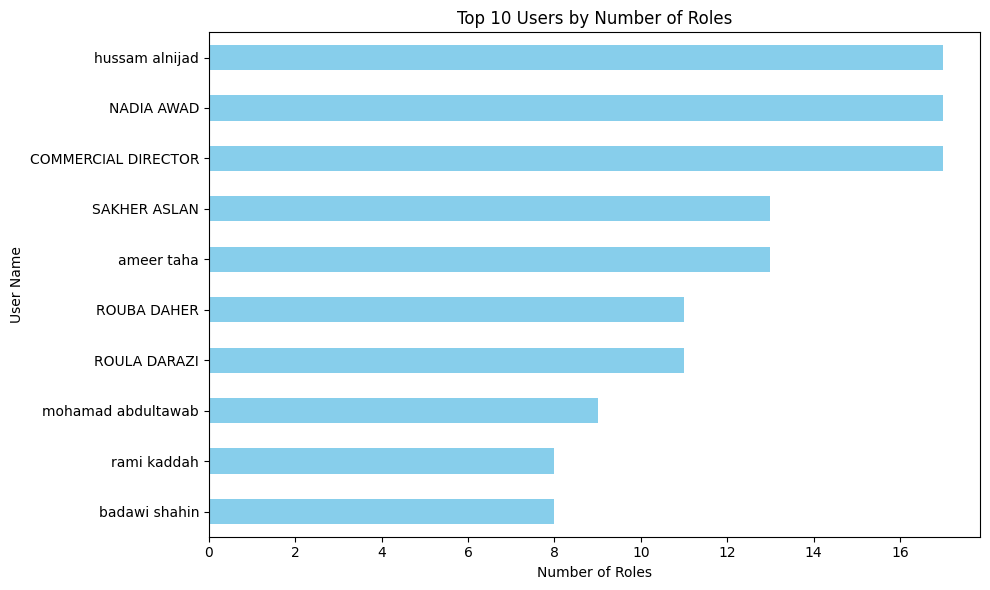

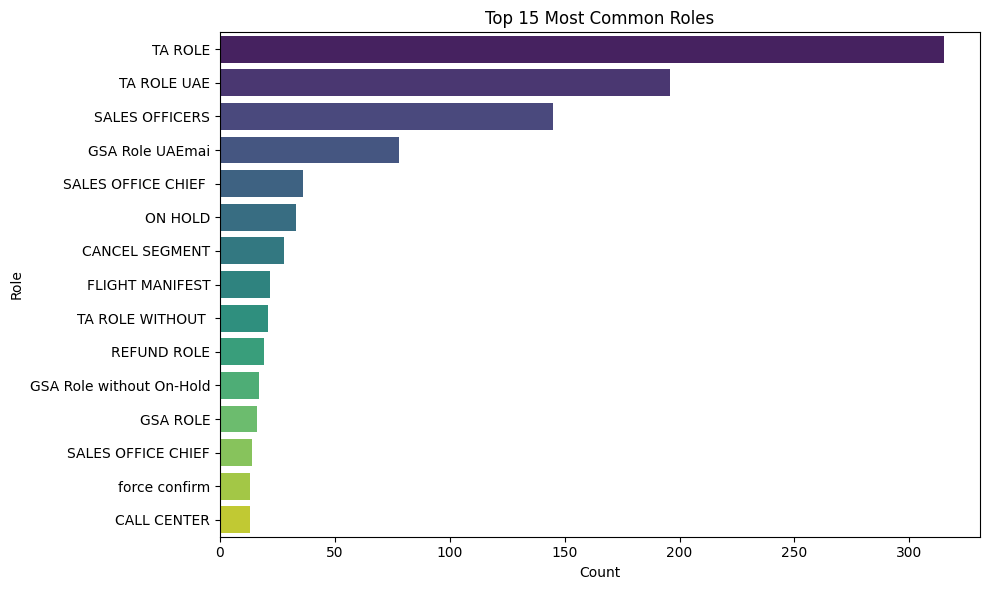

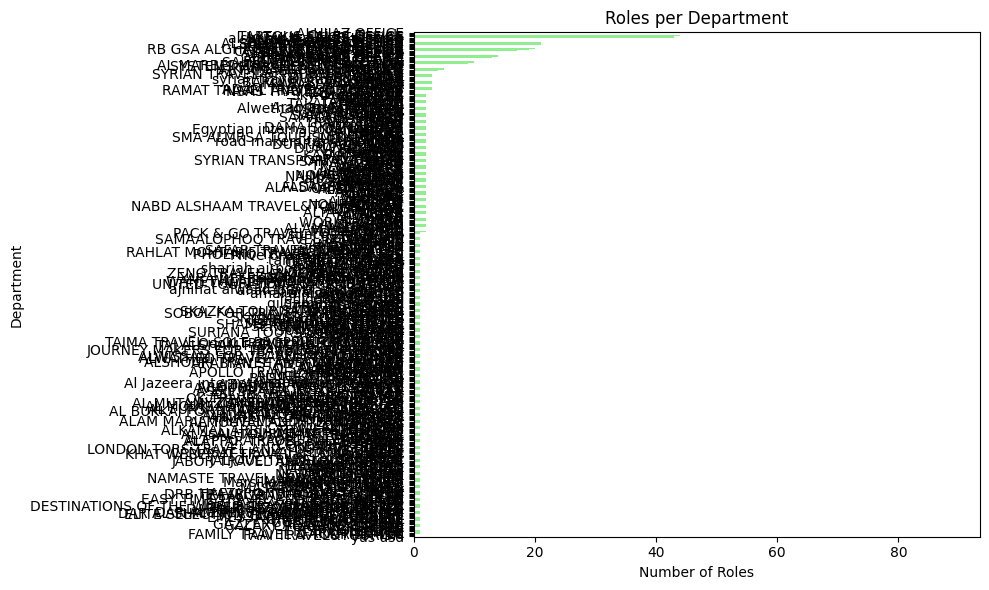

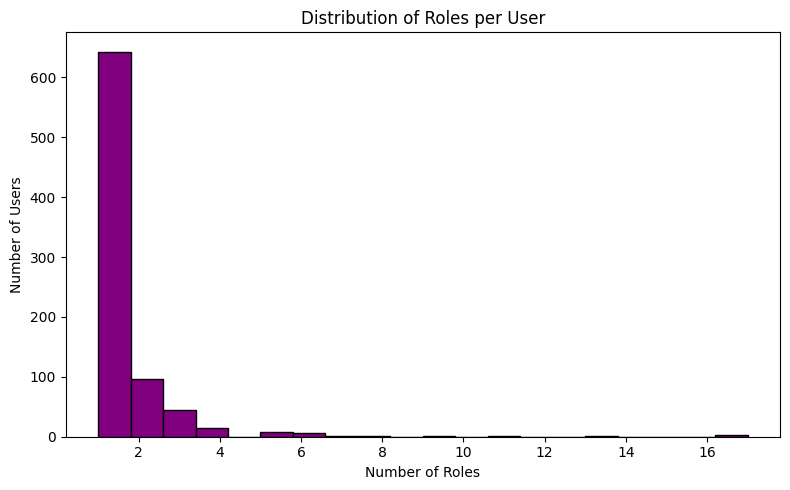

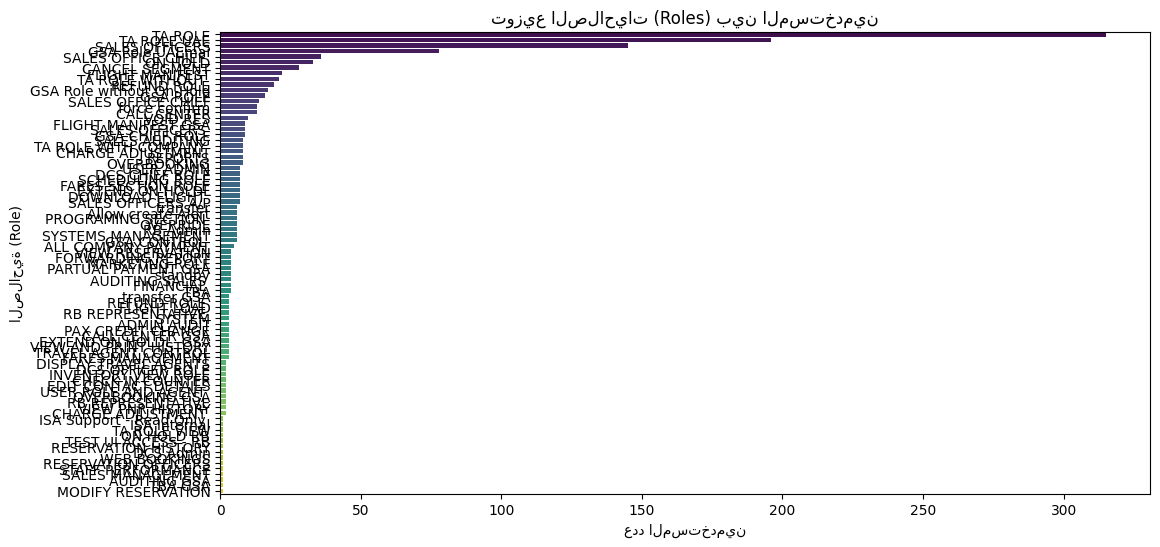

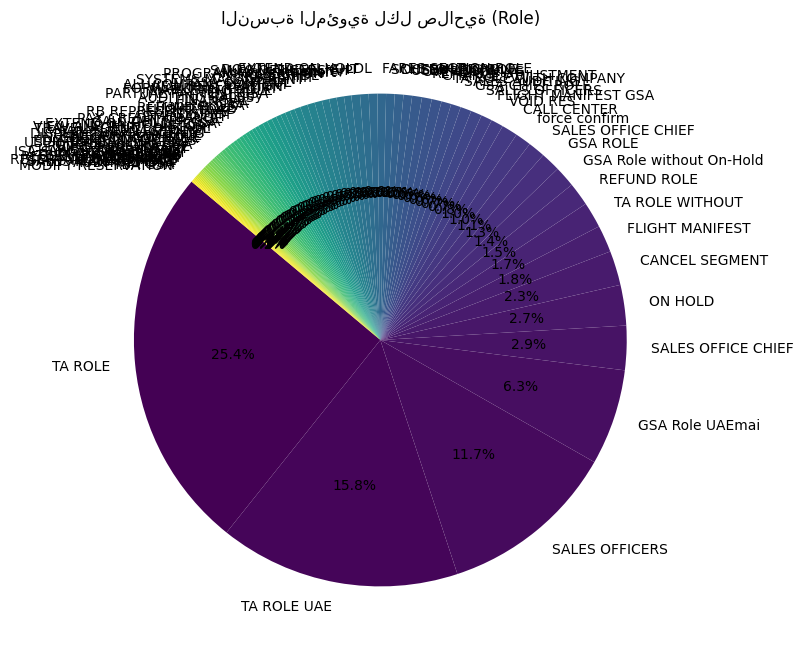

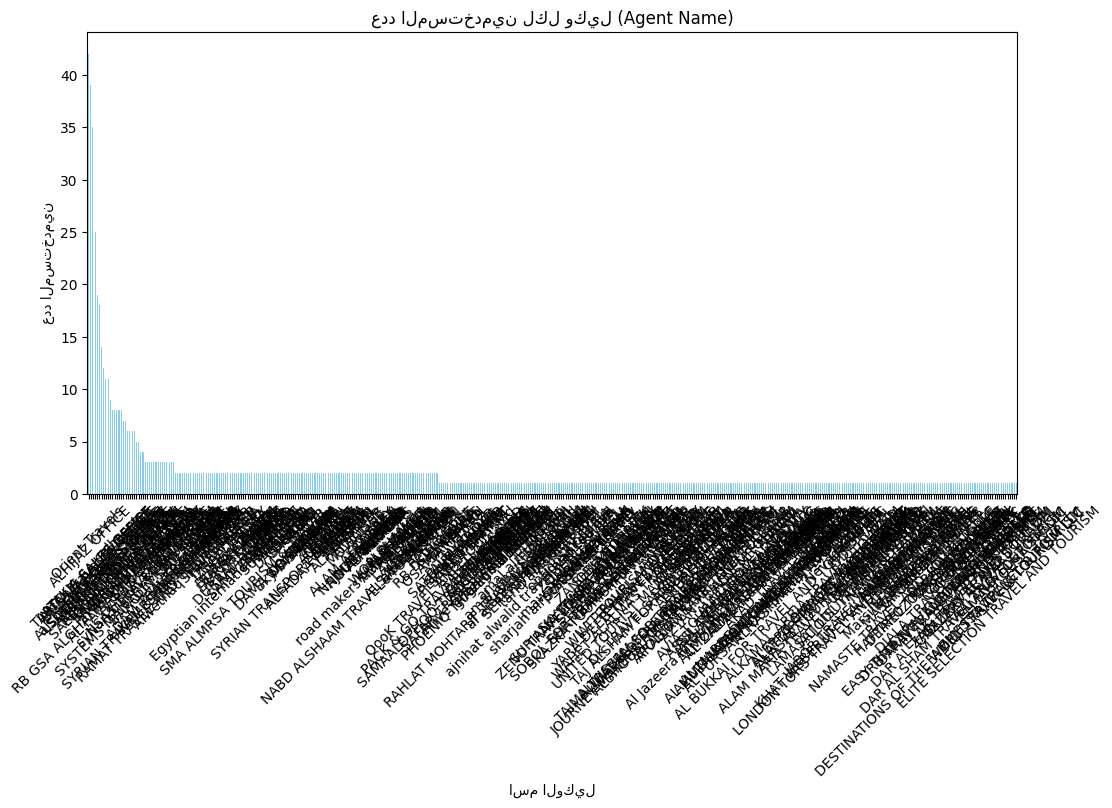

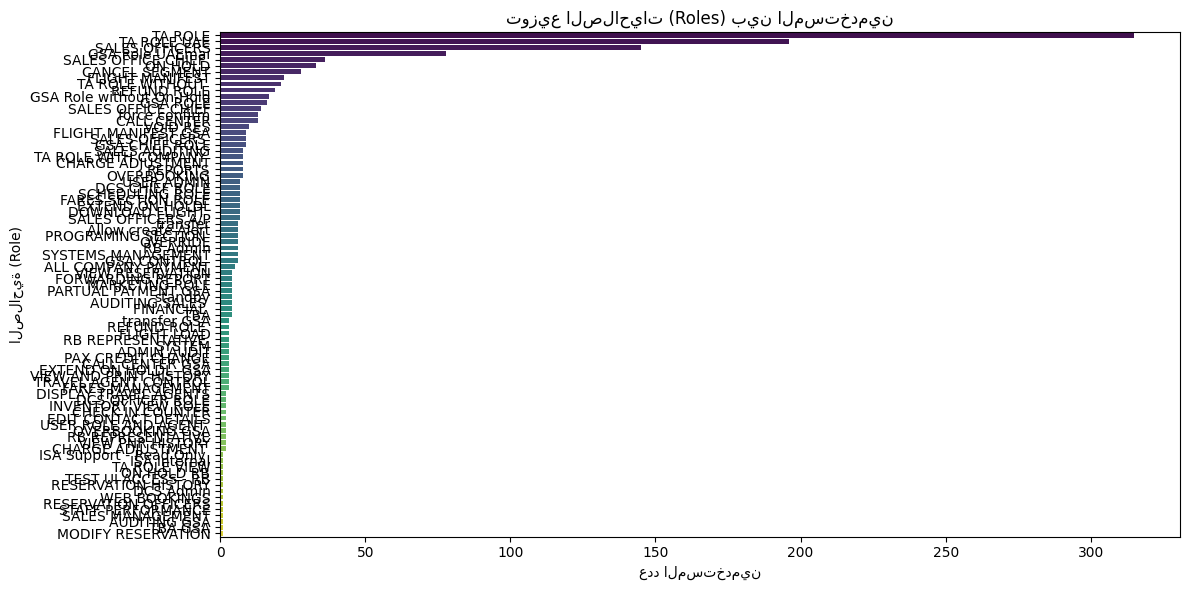

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Role', order=df['Role'].value_counts().index, palette='viridis')
plt.title('توزيع الصلاحيات (Roles) بين المستخدمين')
plt.xlabel('عدد المستخدمين')
plt.ylabel('الصلاحية (Role)')
plt.tight_layout()
plt.show()


In [41]:
agent_summary = df.groupby('Agent Name').agg(
    users_count = ('User ID', 'nunique'),
    avg_roles_per_user = ('Role', lambda x: x.groupby(df['User ID']).nunique().mean())
)

# حساب عدد المستخدمين لأدوار متعددة لكل وكيل
multi_roles_per_agent = df.groupby(['Agent Name', 'User ID'])['Role'].nunique()
multi_roles_per_agent = multi_roles_per_agent[multi_roles_per_agent > 1].groupby('Agent Name').count()

agent_summary['multi_role_users'] = multi_roles_per_agent
agent_summary['multi_role_users'] = agent_summary['multi_role_users'].fillna(0).astype(int)

agent_summary.reset_index(inplace=True)
print(agent_summary)


                Agent Name  users_count  avg_roles_per_user  multi_role_users
0           ACCOUNTING DPT            1                 5.0                 1
1    ADAM TRAVEL & TOURISM            3                 1.0                 0
2                   ADONIA            2                 1.0                 0
3                 ADVANCED            2                 1.0                 0
4              ADVANCEDAUH            1                 1.0                 0
..                     ...          ...                 ...               ...
422  tariq alkaiser travel            1                 1.0                 0
423              top torch            1                 1.0                 0
424               top trip            1                 1.0                 0
425                 uranus            1                 1.0                 0
426                yas usd            1                 1.0                 0

[427 rows x 4 columns]


In [44]:
import pandas as pd

# ✅ 1. Get unique users (by User ID and User Name)
unique_users = df[['User ID', 'User Name']].drop_duplicates().reset_index(drop=True)
print(f"✅ Total unique users: {len(unique_users)}")
display(unique_users)

# ✅ 2. Get unique roles
unique_roles = df['Role'].dropna().drop_duplicates().reset_index(drop=True)
print(f"✅ Total unique roles: {len(unique_roles)}")
display(unique_roles)

# ✅ 3. Get unique departments (Agent Name)
unique_departments = df['Agent Name'].dropna().drop_duplicates().reset_index(drop=True)
print(f"✅ Total unique departments: {len(unique_departments)}")
display(unique_departments)

# ✅ 4. Get all user-role assignments (can be duplicated)
user_roles = df[['User Name', 'Role']].dropna().reset_index(drop=True)
print(f"✅ Total assigned roles: {len(user_roles)}")
dis


✅ Total unique users: 881


TypeError: 'module' object is not callable